# TA-GCN Model Validation
This notebook will compare non-graph and graph-based models for fraud detection, and will validate the TA-GCN model used in the final prediction task.

In [5]:
# Imports
import pyTigerGraph as tg
import json
import os
os.chdir('../src/')
import connect
import visualize
import ta_gcn

# Import TigerGraph instance config
os.chdir('../config/')
with open('tigergraph.json', 'r') as f:
    config = json.load(f)

# Connection parameters
hostName = config['host']
secret = config['secret']

conn = tg.TigerGraphConnection(host=hostName, gsqlSecret=secret, graphname="Ethereum")
conn.getToken(secret)

('2hdtome1qvojf44epfnmn2ghdkl4fl26', 1679773351, '2023-03-25 19:42:31')

### Train and Evaluate TA-GCN
We will first train and evaluate an instance of our TA-GCN model:

In [6]:
# Train and evaluate TA-GCN model
os.chdir('../')
data = connect.get_data('PyG')
data, model, optimizer = ta_gcn.initialize(data)
ta_gcn_acc = ta_gcn.evaluate(data, model, optimizer)
print("TA-GCN Testing Accuracy: " + str(ta_gcn_acc))

Epoch: 001, Train: 0.4944, Test: 0.4869
Epoch: 002, Train: 0.4623, Test: 0.5131
Epoch: 003, Train: 0.4912, Test: 0.5206
Epoch: 004, Train: 0.4912, Test: 0.5206
Epoch: 005, Train: 0.4912, Test: 0.5206
Epoch: 006, Train: 0.4912, Test: 0.5206
Epoch: 007, Train: 0.4912, Test: 0.5206
Epoch: 008, Train: 0.4928, Test: 0.5206
Epoch: 009, Train: 0.4928, Test: 0.5206
Epoch: 010, Train: 0.4928, Test: 0.5206
Epoch: 011, Train: 0.4928, Test: 0.5206
Epoch: 012, Train: 0.4928, Test: 0.5206
Epoch: 013, Train: 0.4928, Test: 0.5169
Epoch: 014, Train: 0.4928, Test: 0.5169
Epoch: 015, Train: 0.4960, Test: 0.5243
Epoch: 016, Train: 0.5024, Test: 0.5169
Epoch: 017, Train: 0.5152, Test: 0.5243
Epoch: 018, Train: 0.5233, Test: 0.5281
Epoch: 019, Train: 0.5522, Test: 0.5581
Epoch: 020, Train: 0.5923, Test: 0.5768
Epoch: 021, Train: 0.6228, Test: 0.6217
Epoch: 022, Train: 0.6597, Test: 0.6330
Epoch: 023, Train: 0.7063, Test: 0.6404
Epoch: 024, Train: 0.7207, Test: 0.6667
Epoch: 025, Train: 0.7191, Test: 0.6966


### Compare Non-Graph and Graph Models
When comparing the average performance of our classifiers in 10 model runs, TA-GCN performs best on the testing set. For this node classification prediction task, Graph Neural Networks tend to perform better than non-graph supervised learning classifiers.

In [7]:
visualize.model_comparison()

,Model,Avg Testing Accuracy,Type
7,TAGCN,82.2,GNN
5,SAGE,81.9,GNN
2,XGB,81.6,Non-Graph
3,GCN,79.6,GNN
4,GAT,78.5,GNN
6,N2V,76.6,GNN
1,kNN,74.6,Non-Graph
0,SVM,60.5,Non-Graph


### Generate Model Explanation
We will now extract additional information about our final TA-GCN model, such as subgraph visualization and node feature importance for a randomly sampled wallet classified as 'fraudulent'.

In [17]:
# Generate model expalantion
idx = visualize.sample_vertex()
print("Generating Model Explanation for Vertex: " + str(idx))
exp = visualize.explainability(data, model, idx)

Generating Model Explanation for Vertex: 1257
Generated explanations in ['node_feat_mask', 'edge_mask']


### Node Feature Importance

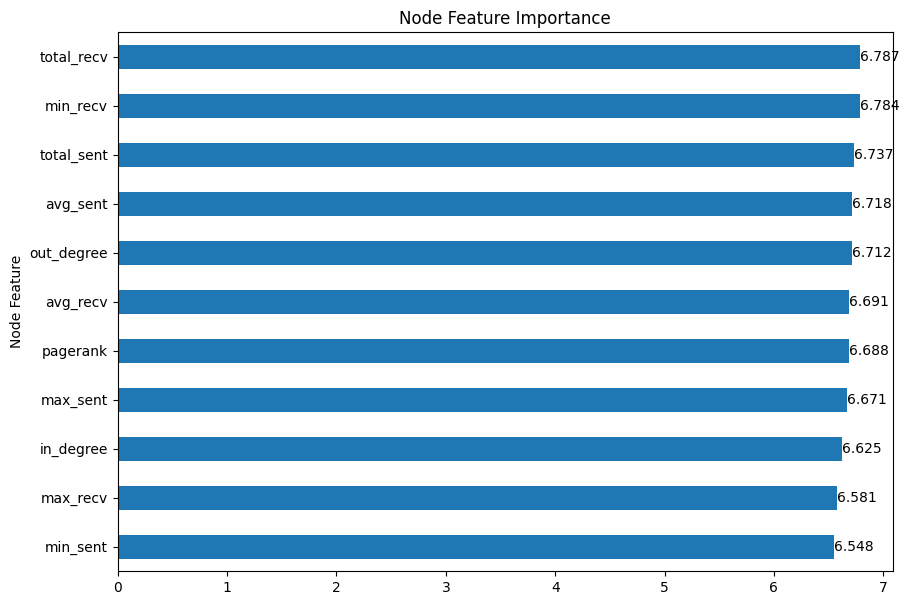

In [18]:
# Visualize feature importance of randomly sampled wallet
fp = 'data/visuals/tagcn_feat_imp.png'
visualize.feature_importance(exp, fp)

### Visualize Subgraph of Randomly Sampled Wallet

(<Axes: title={'center': 'Subgraph of Random Fraudulent Wallet'}>,
 <networkx.classes.digraph.DiGraph at 0x7fd8ac354760>)

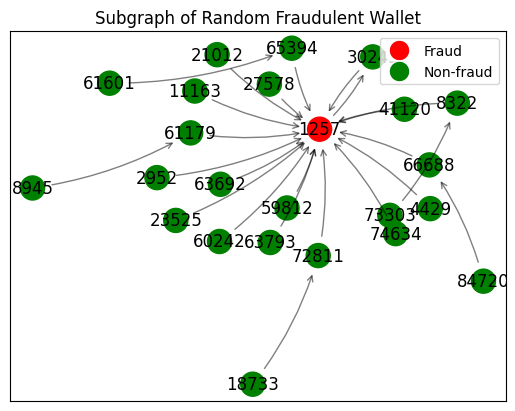

In [19]:
# Visualize subgraph of randomly sampled wallet
fp = 'data/visuals/tagcn_subgraph.png'
visualize.visualize_subgraph(exp, data, idx, fp)